In [54]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Data Ingestion

In [55]:
df = pd.read_csv('weather_data.csv')
df

,date,city,temperature_celsius,humidity_percent,wind_speed_kph,weather_condition
0,2023-01-01,New York,5.0,60.0,10.0,Sunny
1,01/02/2023,New York,NaN,65.0,12.0,Cloudy
2,03-01-2023,New York,7.0,NaN,8.0,Rainy
3,NaN,London,8.0,70.0,15.0,Unknown
4,2023-01-02,London,6.0,75.0,20.0,Snowy
...,...,...,...,...,...,...
95,01-01-2023,London,NaN,NaN,NaN,Rainy
96,09-01-2023,London,NaN,NaN,NaN,Rainy
97,2023-01-11,Tokyo,NaN,NaN,NaN,Sunny
98,15/01/2023,New York,NaN,41.0,24.3,NaN


# Data Cleaning and Transformation:

In [56]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Cleaning numeric values

In [57]:
imputer.fit(df.iloc[:, 2:5].values)

SimpleImputer()

In [58]:
df.iloc[:, 2:5] = imputer.transform(df.iloc[:, 2:5].values)

In [59]:
# This is to remove rows with nan values for date and weather_condition
df = df.dropna()

In [79]:
df.loc[:, 'date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True, errors='coerce')

In [61]:
df = df.dropna()

In [62]:
df.loc[:,'temperature_fahrenheit'] = df['temperature_celsius'] * 9/5 + 32

In [80]:
df = df[df['weather_condition'].notna() & (df['weather_condition'].str.lower() != 'unknown')]

# Data Output

In [64]:
os.makedirs('outputs', exist_ok=True)

In [65]:
df.to_csv('outputs/transformed_weather_data.csv', index=False)

In [66]:
df.loc[:, 'temperature_celsius'] = pd.to_numeric(df['temperature_celsius'], errors='coerce')
top5 = df.nlargest(5, 'temperature_celsius')

with open('outputs/top5_temperatures.txt', 'w') as file:
    file.write(top5.to_string(index=False))

# Bonus

In [69]:
avg_temp = df.groupby('city')['temperature_celsius'].mean().reset_index()

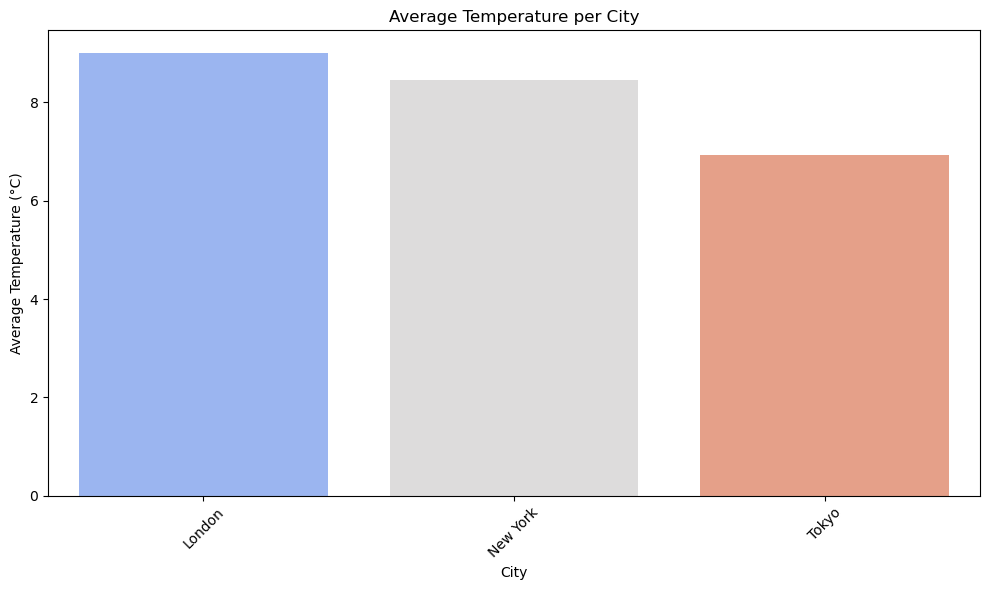

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_temp, x='city', y='temperature_celsius', palette='coolwarm', hue='city')
plt.title('Average Temperature per City')
plt.xlabel('City')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('outputs/average_temperature_per_city.png')

# Show the plot (optional)
plt.show()